# Сжатие картинок с помощью SVD разложения
В этом задании нужно сделать сжатие изображения, сжатие с потерями. Для этого мы используем SVD разложение.

Примерный порядок действий:
1) Найти любую картинку,
2) Прочитать её с помощью библиотеки PIL
3) Преобразовать в numpy массив
4) Применить SVD к матрице - обязательно прочитайте справку по этой функции `np.linalg.svd`

**Примечание**: Цветная картинка представляет собой трёхканальное изображение RBG, поэтому напрямую SVD разложение применить не получится. Либо вы преобразуете изображение в одноканальное (градации серого), усредняя все три канала. Либо делаете SVD для всех трёх каналов в отдельности.

5) Далее оставляете небольшое количество сингулярных значений - 1, 2, 10, 30, 100. И выводите результат в виде получившейся картинки - чем больше сингулярных чисел, тем ближе приближённая матрица к исходной.

6) Сравните количество байт, необходимых для хранения исходной картинки и сжатой версии.

Ниже представлены основные функции и библиотеки, которые вам понадобятся.

Задание оформляете в виде блокнота jupyter. Особо понравившиеся картинки можно сохранить отдельно на диск, но мне удобнее чтобы они присутствовали в самом jupyter блокноте.

In [1]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import os

img = Image.open('pand.jpg')
w, h = img.size

# x = np.array(img, dtype=np.float32) # преобразование из PIL в numpy array
# U, S, V = np.linalg.svd(X, full_matrices=False) # разложение SVD
# # обратное преобразование из numpy array в PIL с сохранение изображения на диск
# Image.fromarray(np.asarray(Y_r, dtype=np.uint8)).save(f'{r}.png')

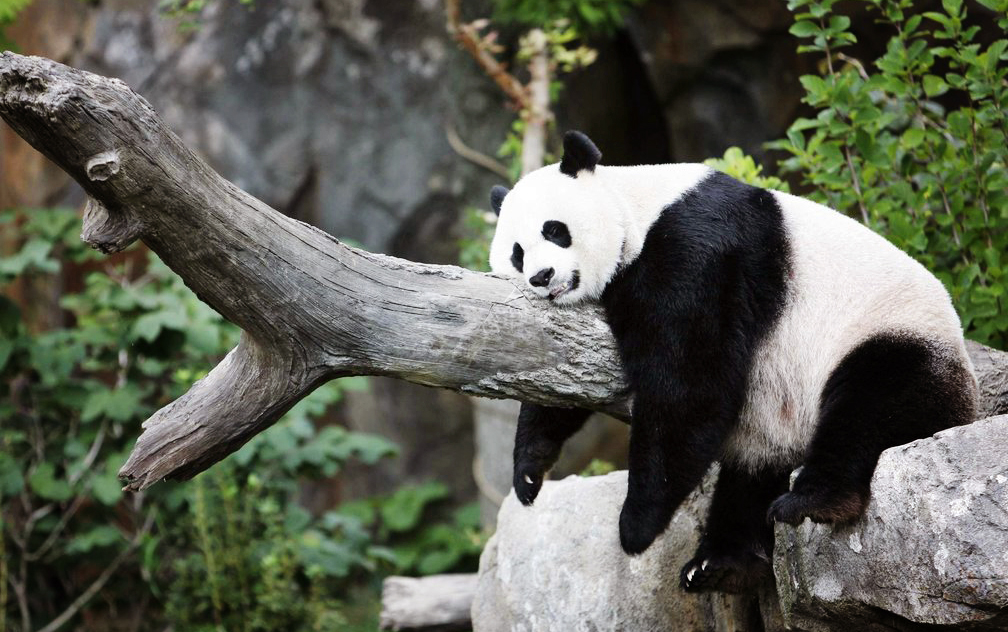

In [2]:
img

In [4]:
size_bytes = os.path.getsize('pand.jpg')
size_kb = size_bytes / 1024
print(f'Размер файла для оригинального изображения: {size_bytes} байт (~{size_kb:.1f} КБ)')

Размер файла для оригинального изображения: 484695 байт (~473.3 КБ)


In [5]:
x = np.array(img) # преобразование из PIL в numpy array
x = np.array([1, 80, 250], dtype=np.uint8)
x = np.array(img, np.float64) # преобразование из PIL в numpy array

In [6]:
U, s, Vt = np.linalg.svd(x[:,:,0], full_matrices=False) # разложение SVD
U.shape, s.shape, Vt.shape

((632, 632), (632,), (632, 1008))

In [7]:
y = U.dot(np.diag(s).dot(Vt))
r = 10
y_r = U[:, :r].dot(np.diag(s[:r]).dot(Vt[:r]))

In [8]:
x_new = x.copy()
for i in range(3):
    U, s, Vt = np.linalg.svd(x[:,:,i], full_matrices=False) # разложение SVD
    x_new[:, :, i] = U[:, :r].dot(np.diag(s[:r]).dot(Vt[:r]))
x_new = np.clip(x_new, 0, 255)
x_new = np.asarray(x_new, dtype=np.uint8)
Image.fromarray(x_new).save(f'pand_small.png')

size_bytes = os.path.getsize('pand_small.png')
size_kb = size_bytes / 1024
print(f'Размер файла для r={r}: {size_bytes} байт (~{size_kb:.1f} КБ)')

Размер файла для r=10: 660475 байт (~645.0 КБ)


Размер файла для r=20: 772056 байт (~754.0 КБ)


(np.float64(-0.5), np.float64(1007.5), np.float64(631.5), np.float64(-0.5))

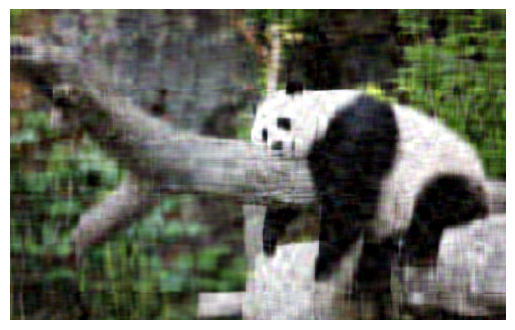

In [17]:
r = 20
x_new = x.copy()
for i in range(3):
    U, s, Vt = np.linalg.svd(x[:,:,i], full_matrices=False) # разложение SVD
    x_new[:, :, i] = U[:, :r].dot(np.diag(s[:r]).dot(Vt[:r]))

x_new = np.clip(x_new, 0, 255)
x_new = np.asarray(x_new, dtype=np.uint8)
Image.fromarray(x_new).save(f'pand_small.png')

size_bytes = os.path.getsize('pand_small.png')
size_kb = size_bytes / 1024
print(f'Размер файла для r={r}: {size_bytes} байт (~{size_kb:.1f} КБ)')

img_small = Image.open('pand_small.png')
plt.imshow(img_small)
plt.axis('off')  # убрать оси

Размер файла для r=30: 842054 байт (~822.3 КБ)


(np.float64(-0.5), np.float64(1007.5), np.float64(631.5), np.float64(-0.5))

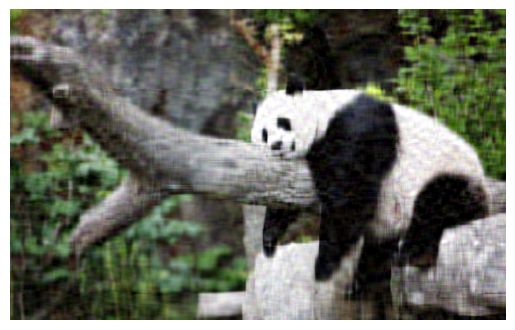

In [16]:
r = 30
x_new = x.copy()
for i in range(3):
    U, s, Vt = np.linalg.svd(x[:,:,i], full_matrices=False) # разложение SVD
    x_new[:, :, i] = U[:, :r].dot(np.diag(s[:r]).dot(Vt[:r]))

x_new = np.clip(x_new, 0, 255)
x_new = np.asarray(x_new, dtype=np.uint8)
Image.fromarray(x_new).save(f'pand_small.png')

size_bytes = os.path.getsize('pand_small.png')
size_kb = size_bytes / 1024
print(f'Размер файла для r={r}: {size_bytes} байт (~{size_kb:.1f} КБ)')

img_small = Image.open('pand_small.png')
plt.imshow(img_small)
plt.axis('off')

Размер файла для r=200: 1166216 байт (~1138.9 КБ)


(np.float64(-0.5), np.float64(1007.5), np.float64(631.5), np.float64(-0.5))

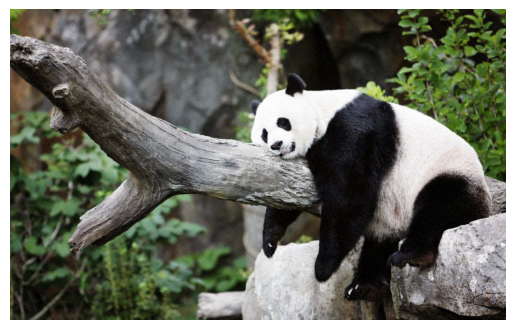

In [15]:
r = 200
x_new = x.copy()
for i in range(3):
    U, s, Vt = np.linalg.svd(x[:,:,i], full_matrices=False) # разложение SVD
    x_new[:, :, i] = U[:, :r].dot(np.diag(s[:r]).dot(Vt[:r]))

x_new = np.clip(x_new, 0, 255)
x_new = np.asarray(x_new, dtype=np.uint8)
Image.fromarray(x_new).save(f'pand_small.png')

size_bytes = os.path.getsize('pand_small.png')
size_kb = size_bytes / 1024
print(f'Размер файла для r={r}: {size_bytes} байт (~{size_kb:.1f} КБ)')

img_small = Image.open('pand_small.png')
plt.imshow(img_small)
plt.axis('off')  # убрать оси